<a href="https://colab.research.google.com/github/031wnstjd/Deep-Learning/blob/master/DL_07_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL_07 - CNN

In [ ]:
name = input("Name :")
ID = input("student ID :")

Name :추준성
student ID :2016145028


## 실습

Network, hyperparamer를 수정하여 CIFAR10의 test accuracy(max)가 **40%** 이상 나오는 모델을 설계하시오.

### CNN설계

In [ ]:
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [ ]:
class Net_practice(nn.Module): 
  def __init__(self):
      super(Net_practice, self).__init__()
      
      self.conv_layer = nn.Sequential(
          
          # Conv Layer block 1
          nn.Conv2d(3, 32, 3, 1, 1),
          nn.BatchNorm2d(32),
          nn.ReLU(inplace=True),
          nn.Conv2d(32, 64 ,3, 1, 1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),

          # Conv Layer block 2
          nn.Conv2d(64, 128, 3, 1, 1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
          nn.Conv2d(128, 128 ,3, 1, 1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
          nn.Dropout2d(p=0.05), # overfitting 방지

          # Conv Layer block 3
          nn.Conv2d(128, 256, 3, 1, 1),
          nn.BatchNorm2d(256),
          nn.ReLU(inplace=True),
          nn.Conv2d(256, 256 ,3, 1, 1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2, 2),
      )

      self.fc_layer = nn.Sequential(
          nn.Dropout(p=0.1),
          nn.Linear(4096, 1024),
          nn.ReLU(inplace=True),
          nn.Linear(1024, 512),
          nn.ReLU(inplace=True),
          nn.Dropout(p=0.1),
          nn.Linear(512, 10)
      )

  def forward(self, x):
      
      # conv layers
      x = self.conv_layer(x)

      # flatten
      x = x.view(x.size(0), -1)

      # fc layer
      x = self.fc_layer(x)

      return x


### 하이퍼파라미터

In [ ]:
epoch_size = 10
learning_rate = 1e-3 
batch_size = 64

### Training

In [ ]:


import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


transform = transforms.Compose(
    [transforms.ToTensor(), #이미지를 tensor자료형으로 변한
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 정규화


batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)




Files already downloaded and verified
Files already downloaded and verified


In [ ]:

net = Net_practice().cuda()




criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.SGD(net.parameters(), lr=learning_rate) 

 # 반복 횟수 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

history = {'val_acc': []}


for epoch in range(epoch_size):
  net.train() # weight&bias를 update할 수 있는 상태로 변환
  total_loss = 0.0
  for i, (inputs, targets) in enumerate(trainloader): 
    inputs = inputs.cuda() #gpu연산
    targets = targets.cuda() #gpu연산

    # gradient를 0으로 초기화
    optimizer.zero_grad()

    
    outputs = net(inputs) #forward 
    loss = criterion(outputs, targets) #loss계산
    loss.backward() #backward -> gradient계산
    optimizer.step() #최적화 -> weight&bias update

    total_loss += loss.item()


  net.eval() # evaluation 상태로 변환
  for j, (test_data, test_target) in enumerate(testloader):
    test_data = test_data.cuda() #gpu연산 
    test_target = test_target.cuda() #gpu연산


    pred = net(test_data) #forward
    pred = torch.argmax(pred, dim = 1) #accuracy 측정
    pred_c = pred
    target_c = test_target

    if j == 0:
      acc = (pred_c==target_c)
    else : 
      acc = torch.cat([acc, (pred_c==target_c)], axis=0)
    
  acc = acc.float().mean() * 100
  history["val_acc"].append(acc.item())

  print(epoch, "test accuracy     :", acc)
  print("============================================")





0 test accuracy     : tensor(22.1600, device='cuda:0')
1 test accuracy     : tensor(31.2300, device='cuda:0')
2 test accuracy     : tensor(35.7500, device='cuda:0')
3 test accuracy     : tensor(39.0500, device='cuda:0')
4 test accuracy     : tensor(42.8800, device='cuda:0')
5 test accuracy     : tensor(45.3100, device='cuda:0')
6 test accuracy     : tensor(47.8600, device='cuda:0')
7 test accuracy     : tensor(52.0200, device='cuda:0')
8 test accuracy     : tensor(54.2700, device='cuda:0')


### 결과

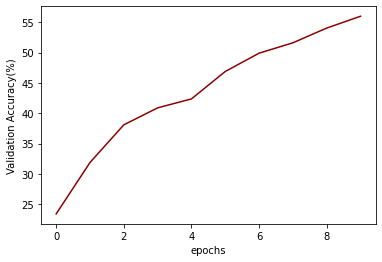

나의 최고 test accuracy :  56.0


In [ ]:
from matplotlib import pyplot as plt

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')

plt.plot(range(epoch_size),history['val_acc'], label='정확도(%)', color='darkred')
plt.show()

print("나의 최고 test accuracy : ",max(history['val_acc']))